In [12]:
import json

from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import mplfinance as mpf

In [13]:
with open(file="../data_set/example.json", mode="r") as file:
    input_data = json.load(file)

In [14]:
x: np.ndarray = np.column_stack(tup=(input_data["open"], input_data["close"], input_data["high"], input_data["low"], input_data["volume"]))
print(x)

[[42780.      42834.94    42901.1     42730.03      173.63661]
 [42834.94    42961.84    42986.06    42795.41      169.47648]
 [42961.83    43069.98    43160.86    42914.13      298.77136]
 ...
 [47566.11    47593.24    47683.7     47544.4       160.1838 ]
 [47593.24    47714.91    47720.      47593.24      129.70661]
 [47714.92    47898.66    47963.      47634.72      391.51242]]


In [18]:
eps: float = 1000  # Defines the maximum distance between two samples so that they are considered to be in the same neighborhood.
min_samples: int = 1  # Specifies the minimum number of samples needed in a neighborhood for a point to be considered a center point.

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels: np.ndarray = dbscan.fit_predict(X=x)
print(labels, type(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 3
 4 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 

In [16]:
labels_set = set(labels)
s_r_calculated_list = []
for label in labels_set:
    if label == -1:
        continue

    cluster = x[labels == label]
    pivot_price = np.mean(cluster[:, 0])
    limits_down = np.min(cluster[:, 0])
    limits_up = np.max(cluster[:, 0])
    score = len(cluster)
    accumulated_volume = np.sum(cluster[:, 4])

    s_r_calculated_list.append({
        "pivotPrice": pivot_price,
        "limitsDown": limits_down,
        "limitsUp": limits_up,
        "score": score,
        "accumulatedVolume": accumulated_volume
    })

print(s_r_calculated_list, len(s_r_calculated_list))

[{'pivotPrice': 42476.84449999999, 'limitsDown': 40841.94, 'limitsUp': 43995.1, 'score': 320, 'accumulatedVolume': 137561.19903999998}, {'pivotPrice': 44007.53, 'limitsDown': 44007.53, 'limitsUp': 44007.53, 'score': 1, 'accumulatedVolume': 2203.5378}, {'pivotPrice': 44833.46181818182, 'limitsDown': 44623.46, 'limitsUp': 44945.81, 'score': 11, 'accumulatedVolume': 7232.53705}, {'pivotPrice': 44855.63, 'limitsDown': 44855.63, 'limitsUp': 44855.63, 'score': 1, 'accumulatedVolume': 3013.23613}, {'pivotPrice': 46449.22, 'limitsDown': 46449.22, 'limitsUp': 46449.22, 'score': 1, 'accumulatedVolume': 6171.46155}, {'pivotPrice': 47332.14, 'limitsDown': 47332.14, 'limitsUp': 47332.14, 'score': 1, 'accumulatedVolume': 2715.50006}, {'pivotPrice': 47731.84621951219, 'limitsDown': 46783.89, 'limitsUp': 48353.34, 'score': 164, 'accumulatedVolume': 70829.60243999999}] 7


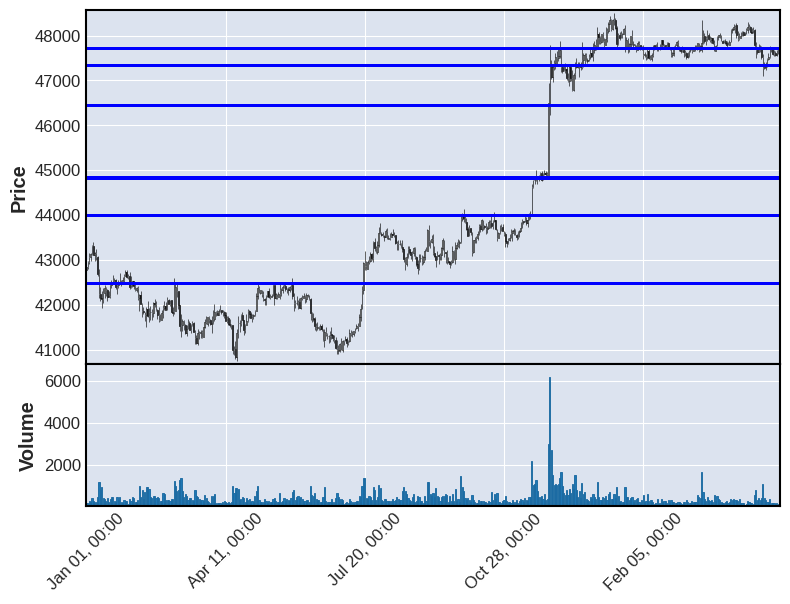

In [17]:
df = pd.read_json("../data_set/example.json")
df['avg_price'] = df[['open', 'close', 'high', 'low']].mean(axis=1)

df['Date'] = pd.date_range('2023-01-01', periods=499)
df['Date'] = pd.to_datetime(df['Date'])
df.index = pd.DatetimeIndex(df['Date'])

sr_lines = [
    item["pivotPrice"]
    for item in s_r_calculated_list
]

mpf.plot(
    data=df,
    type='candle',
    tight_layout=True, 
    datetime_format='%b %d, %H:%M', 
    volume=True,
    hlines=dict(
        hlines=sr_lines,
        colors=["b" for _ in range(len(sr_lines))], 
        linewidths=(2)
    )
)